In [ ]:
pip install tensorflow-gpu==2.10.0-rc0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.1 MB 12 kB/s 
     |████████████████████████████████| 1.6 MB 42.2 MB/s 
     |████████████████████████████████| 438 kB 57.1 MB/s 
     |████████████████████████████████| 5.8 MB 31.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.8.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 44.15 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [6]:
img_width = 64
img_height = 64

In [7]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [8]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [9]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [10]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

CNN Model Building

In [11]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


1378/1378 [==============================] - 93s 67ms/step - loss: 0.5743 - accuracy: 0.6932 - val_loss: 0.4225 - val_accuracy: 0.8690
Epoch 2/5
1378/1378 [==============================] - 91s 66ms/step - loss: 0.2409 - accuracy: 0.9182 - val_loss: 0.1788 - val_accuracy: 0.9361
Epoch 3/5
1378/1378 [==============================] - 91s 66ms/step - loss: 0.1957 - accuracy: 0.9387 - val_loss: 0.1828 - val_accuracy: 0.9403
Epoch 4/5
1378/1378 [==============================] - 91s 66ms/step - loss: 0.1821 - accuracy: 0.9434 - val_loss: 0.1642 - val_accuracy: 0.9436
Epoch 5/5
1378/1378 [==============================] - 90s 65ms/step - loss: 0.1683 - accuracy: 0.9481 - val_loss: 0.1635 - val_accuracy: 0.9436


In [15]:
history.history

{'loss': [0.5743374824523926,
  0.24090006947517395,
  0.19570839405059814,
  0.1820828765630722,
  0.16827373206615448],
 'accuracy': [0.6932148337364197,
  0.9181784987449646,
  0.9386792182922363,
  0.9433508515357971,
  0.948067843914032],
 'val_loss': [0.4224556088447571,
  0.17881111800670624,
  0.18282181024551392,
  0.16422995924949646,
  0.1635124832391739],
 'val_accuracy': [0.8689655065536499,
  0.9361161589622498,
  0.9402903914451599,
  0.9435571432113647,
  0.9435571432113647]}

In [16]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

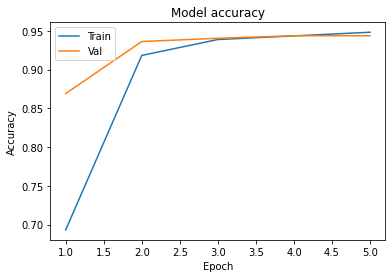

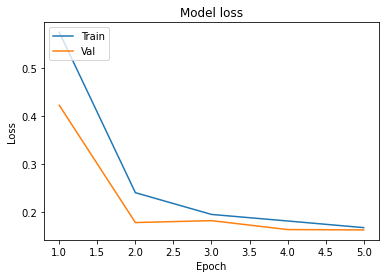

In [17]:
plot_learningCurve(history, 5)